In [35]:
# Import modules
%matplotlib inline
import matplotlib
import scipy as sp
import matplotlib.pyplot as plt
# Select random seed
random_state = 0

# Model Complexity

We make use of scikit pipiline mechanism to estimate linear classification of different order

In [36]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures

Th PolynomialFeatures functions generates higher order polynoms from the initial samples. For instances, from (x_1, x_2) we could generate (1, x_1, x_2, x_1x_2, x_1^2,x_2^2). It can be usefull when the decision boundary is not linear.

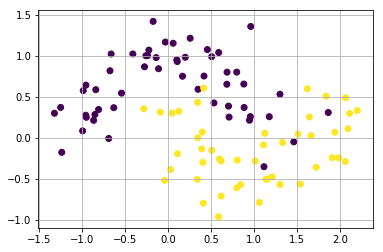

In [62]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000, random_state=random_state, noise=0.25)

from sklearn.model_selection import train_test_split
# We split the initial set in two sets: one use for training the model, 
# and one use to compute the validation error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state= random_state )

y_train[y_train==0]=-1
y_test[y_test==0]=-1

plt.scatter(X_train[:,0], X_train[:,1],c=y_train)
plt.grid()
# Plot the decision functions
XX, YY = sp.meshgrid(sp.linspace(X_train[:,0].min(), X_train[:,0].max(),200),
                     sp.linspace(X_train[:,1].min(), X_train[:,1].max(),200))
XY = sp.vstack([ XX.flatten(), YY.flatten() ]).T

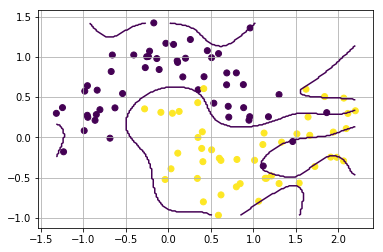

In [63]:
from sklearn import linear_model
degree = 15 # Degree of the polynomial 1 ->20
model = make_pipeline(PolynomialFeatures(degree), linear_model.RidgeClassifier(alpha=1e-6,normalize=True))
model.fit(X_train, y_train)
yp= model.predict(XY)
plt.contour(XX,YY,yp.reshape(XX.shape),[0])
plt.grid()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)


# Test error VS Train Error

. Then we can see the influence of the polynom order on the classifification accuracy.

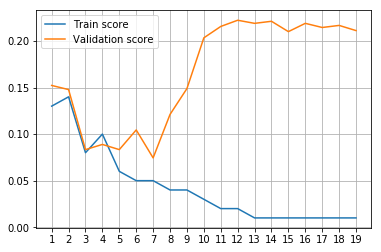

In [67]:
from sklearn.model_selection import validation_curve
lin_model = linear_model.RidgeClassifier(alpha=1e-6,normalize=True)

degrees= sp.arange(1,20)
train_scores= sp.zeros(degrees.shape)
test_scores= sp.zeros(degrees.shape)
for i,deg in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(deg), lin_model )
    model.fit(X_train,y_train )
    y_pred= model.predict( X_train )
    train_scores[i] = sp.mean( y_train != y_pred)
    y_pred= model.predict( X_test )
    test_scores[i] = sp.mean( y_test != y_pred)
    

#train_scores, valid_scores = validation_curve(pipe, X, y, "poly__degree", range(1,20), cv=10)
plt.plot(range(1, 20), train_scores, label="Train score")
plt.plot(range(1, 20), test_scores, label="Validation score")
plt.grid()
plt.xticks(range(1, 20))
plt.legend()